In [1]:
# Imports
from shipnet_randv1_1 import MultiPlex,ShipNET


import datetime
import os
import time

# Scientific computing imports
import itertools
import numpy
import matplotlib.pyplot as plt
import networkx as nx
import pandas
import seaborn; seaborn.set()


################################
#USING Disjoint Single Location!!!
################################

In [2]:
# set directory
# os.chdir("C:\Users\colinsh\Documents\compship\Data")
# os.listdir("./")
os.chdir("C:\Users\colinsh\Documents")
os.listdir("./")

['3-13-17  A Theoretical Framework for Naval Distributed Systems and Arrangements Design (Recovered).docx',
 'AbsentVoterBallot_105377_7.pdf',
 'ACC2016_presentation_HaoWang.pptx',
 'Adjudications',
 'Anker Gaming Mouse',
 'BitBucket',
 'Blank tent card.docx',
 'cache',
 'Custom Office Templates',
 'd5239-9.pdf',
 'Delta_8_10_16.docx',
 'Delta_8_10_16.pdf',
 'DesignSim',
 'desktop.ini',
 'Distribution Systems_UM_Jan_2017.pdf',
 'Distribution Systems_UM_Jan_2017.pptx',
 'DS82_Complete_Passport.pdf',
 'GitHub',
 'gitignore_global.txt',
 'Groupon_1.pdf',
 'Groupon_2.pdf',
 'Groupon_3.pdf',
 'Groupon_4.pdf',
 'HCGG',
 'hgignore_global.txt',
 'Laptop request_Shields.pdf',
 'League of Legends',
 'MATLAB',
 'My Data Sources',
 'My Music',
 'My Pictures',
 'My Videos',
 'OE Review.docx',
 'OE Review_Two-stage machinery configuration.pdf',
 'OneNote Notebooks',
 'ONR Roadmap',
 'Python Scripts',
 'simpleship_3bh_1r',
 'simpleship_3bh_1r_2',
 'simpleship_wred_50',
 'Statistical Mechanics of Syst

In [3]:
# Now, we'll define our methods to store a model's output

def store_model_parameters(model, run_output_path):
    """
    Store model parameters from a model to the run output path.
    """
    # Create parameters dictionary
    model_parameters = {"num_bh": model.num_bh,
                        "height_dc": model.height_dc,
                        "redundancy": model.redundancy,
                        "permeability": model.permeability,
                        "num_paths": model.num_paths,
                        "method": model.method,
                       }
    # Convert to dataframe and save
    model_parameters_df = pandas.DataFrame(model_parameters.items(),
                             columns=["parameter", "value"])
    model_parameters_df.to_csv(os.path.join(run_output_path, "parameters.csv"),index=False)#,index=False
    

def store_model_csv(model, run_output_path):
    """
    Store CSV data from a model to the run output path.
    """
    # Create interaction dataframe
    
    # Save the dataframes
    model.arr_a_list[0].to_csv(os.path.join(run_output_path, "affordance_incidence.csv"),index=False)
    model.arr_ae_list[0].to_csv(os.path.join(run_output_path, "affordance_edge_incidence.csv"),index=False)
    model.arr_n_cmplx_list[0].to_csv(os.path.join(run_output_path, "node_complexity.csv"),index=False)
    model.arr_a_cmplx_list[0].to_csv(os.path.join(run_output_path, "affordance_complexity.csv"),index=False)
    #model.total_int_list.to_csv(os.path.join(run_output_path, "total_interactions.csv"))
    model.arr_e_list_method[0].to_csv(os.path.join(run_output_path, "route.csv"),index=False)
    model.arr_n_list_method[0].to_csv(os.path.join(run_output_path, "location.csv"),index=False)
    #tsdata_df.to_csv(os.path.join(run_output_path, "timeseries.csv"))
    

def store_model(model, output_path="output"):
    """
    Store a model to the model output path.
    """
    # First, we need to make sure the directory exists.
    try:
        os.makedirs(output_path)
    except:
        pass
    
    """
    Next, we need to create a unique timestamp for the model.
    We'll do that using a timestamp of the form: YYYYMMDD-Run#
    
    We then need to create that directory too.
    """
    
    timestamp_suffix = time.strftime("%Y%m%d")
    
    run_id = 0
    run_output_path = os.path.join(output_path,
                                 "ship-bh{0}-h{1}-red{2}-{3}-{4}".format(model.num_bh,
                                                      model.height_dc,
                                                      model.redundancy,
                                                      timestamp_suffix,                   
                                                      run_id))
    # Get a unique run #
    while os.path.exists(run_output_path):
        run_id += 1
        run_output_path = os.path.join(output_path,
                                 "ship-bh{0}-h{1}-red{2}-{3}-{4}".format(model.num_bh,
                                                      model.height_dc,
                                                      model.redundancy,
                                                      timestamp_suffix,                   
                                                      run_id))        

    try:
        os.makedirs(run_output_path)
    except:
        pass
    
    """
    Finally, we need to store data and figures to the path.
    """
    store_model_parameters(model, run_output_path)
    store_model_csv(model, run_output_path)
    

In [ ]:
def warship_setup():    
    #Setup 10KT Warship
    warship=MultiPlex()
    warship.add_plex('P')
    warship.add_plex('EM_P')
    warship.add_plex('C')
    warship.add_plex('I')
    warship.add_plex('H')

    #Define nodes
    warship.add_plex_node('GS_1',data={'loc':[],'loc_possible':[(2,2,0)]})
    warship.add_plex_node('GS_2',data={'loc':[],'loc_possible':[(3,0,0)]})
    warship.add_plex_node('AUX_1',data={'loc':[],'loc_possible':[(4,2,0)]})
    warship.add_plex_node('AUX_2',data={'loc':[],'loc_possible':[(5,0,0)]})
    warship.add_plex_node('EM_1',data={'loc':[],'loc_possible':[(1,0,0)]})
    warship.add_plex_node('EM_2',data={'loc':[],'loc_possible':[(2,2,0)]})
    warship.add_plex_node('Chiller_1',data={'loc':[],'loc_possible':[(4,1,0)]})
    warship.add_plex_node('Chiller_2',data={'loc':[],'loc_possible':[(5,1,0)]})
    warship.add_plex_node('Sonar',data={'loc':[],'loc_possible':[(6,1,0)]})
    warship.add_plex_node('CIC_1',data={'loc':[],'loc_possible':[(4,1,4)]})
    warship.add_plex_node('CIC_2',data={'loc':[],'loc_possible':[(2,1,3)]})
    warship.add_plex_node('ADS_1',data={'loc':[],'loc_possible':[(0,0,3)]})
    warship.add_plex_node('ADS_2',data={'loc':[],'loc_possible':[(0,2,3)]})
    warship.add_plex_node('ADS_3',data={'loc':[],'loc_possible':[(7,0,3)]})
    warship.add_plex_node('ADS_4',data={'loc':[],'loc_possible':[(7,2,3)]})
    warship.add_plex_node('VLS',data={'loc':[],'loc_possible':[(1,1,3)]})
    warship.add_plex_node('Radar',data={'loc':[],'loc_possible':[(4,1,5)]})
    warship.add_plex_node('LASER_1',data={'loc':[],'loc_possible':[(2,1,5)]})
    warship.add_plex_node('LASER_2',data={'loc':[],'loc_possible':[(5,1,5)]})
    warship.add_plex_node('Railgun',data={'loc':[],'loc_possible':[(6,1,3)]})
    warship.add_plex_node('Hotel_1',data={'loc':[],'loc_possible':[(2,1,2)]})
    warship.add_plex_node('Hotel_2',data={'loc':[],'loc_possible':[(3,1,2)]})
    warship.add_plex_node('Hotel_3',data={'loc':[],'loc_possible':[(4,1,2)]})
    warship.add_plex_node('Hotel_4',data={'loc':[],'loc_possible':[(5,1,2)]})
    warship.add_plex_node('Machinery_1',data={'loc':[],'loc_possible':[(7,1,1)]})
    warship.add_plex_node('Machinery_2',data={'loc':[],'loc_possible':[(7,1,2)]})
    warship.add_plex_node('Machinery_3',data={'loc':[],'loc_possible':[(0,1,1)]})
    warship.add_plex_node('Comm',data={'loc':[],'loc_possible':[(5,1,4)]})

    ##Add COMMS

    #Define edges
    #EM_P
    warship.add_plex_edge(('GS_1','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','EM_2','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','EM_2','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','EM_2','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','EM_1','EM_P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','EM_2','EM_P'),data={'paths':[]})

    #P
    warship.add_plex_edge(('AUX_1','Chiller_1','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Chiller_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','CIC_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','CIC_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','CIC_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','CIC_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Sonar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','ADS_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','ADS_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','VLS','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','VLS','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','LASER_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','LASER_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','LASER_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','LASER_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Radar','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Comm','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Railgun','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Railgun','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_1','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_1','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_2','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_3','P'),data={'paths':[]})
    warship.add_plex_edge(('AUX_2','Hotel_4','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Machinery_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Machinery_1','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Machinery_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Machinery_2','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_1','Machinery_3','P'),data={'paths':[]})
    warship.add_plex_edge(('GS_2','Machinery_3','P'),data={'paths':[]})

    #C
    warship.add_plex_edge(('Chiller_1','Radar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Radar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Comm','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Comm','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Sonar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Sonar','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Railgun','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Railgun','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','VLS','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','VLS','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','LASER_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','LASER_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','LASER_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','LASER_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','CIC_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','CIC_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','CIC_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','CIC_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_3','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_1','Hotel_4','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_1','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_2','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_3','C'),data={'paths':[]})
    warship.add_plex_edge(('Chiller_2','Hotel_4','C'),data={'paths':[]})

    #I
    warship.add_plex_edge(('Radar','CIC_1','I'),data={'paths':[]})
    warship.add_plex_edge(('Radar','CIC_2','I'),data={'paths':[]})
    warship.add_plex_edge(('Sonar','CIC_1','I'),data={'paths':[]})
    warship.add_plex_edge(('Sonar','CIC_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','VLS','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','VLS','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','LASER_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','LASER_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','LASER_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','LASER_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','Railgun','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','Railgun','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_3','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','ADS_4','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_1','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_2','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_3','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','ADS_4','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_1','Comm','I'),data={'paths':[]})
    warship.add_plex_edge(('CIC_2','Comm','I'),data={'paths':[]})

    #H
    #warship.add_plex_edge(('AUX_1','Comm','H'),data={'paths':[]})
    #warship.add_plex_edge(('AUX_1','Machinery_1','H'),data={'paths':[]})
    #warship.add_plex_edge(('AUX_1','Machinery_3','H'),data={'paths':[]})
    #warship.add_plex_edge(('Machinery_1','Machinery_3','H'),data={'paths':[]})
    #warship.add_plex_edge(('Machinery_1','Comm','H'),data={'paths':[]})
    #warship.add_plex_edge(('Machinery_3','Comm','H'),data={'paths':[]})

    for n1 in warship.global_node:
        for n2 in warship.global_node:
            if n1==n2:
                continue
            if (n2,n1) in warship.plex[3].edges():
                continue
            warship.add_plex_edge((n1,n2,'H'),data={'paths':[]})


    ship=ShipNET([8,3,6])
    for x in range(2):
        for z in range (4,6):
            for y in range(3):
                ship.remove_ship_node((x,y,z))
    for x in range(6,8):
        for z in range (4,6):
            for y in range(3):
                ship.remove_ship_node((x,y,z))
    ship.remove_ship_node((0,0,0))
    ship.remove_ship_node((0,1,0))
    ship.remove_ship_node((0,2,0))

In [4]:
#10kt Simple
simpleship=MultiPlex()
simpleship.add_plex('P')
simpleship.add_plex('EM_P')
simpleship.add_plex('C')
simpleship.add_plex('I')
simpleship.add_plex('H')

#Nodes
simpleship.add_plex_node('GS',data={'loc':[],'loc_possible':[(2,1,0)]})
simpleship.add_plex_node('AUX',data={'loc':[],'loc_possible':[(4,1,0)]}) #Move back for testing NEJ
simpleship.add_plex_node('PR_MVR',data={'loc':[],'loc_possible':[(1,1,0)]})
simpleship.add_plex_node('Chiller_1',data={'loc':[],'loc_possible':[(5,1,0)]})
simpleship.add_plex_node('Bridge',data={'loc':[],'loc_possible':[(4,1,5)]}) #Sonar was at 4,1,5 for original 
simpleship.add_plex_node('Comm',data={'loc':[],'loc_possible':[(4,1,3)]})
simpleship.add_plex_node('CIC_1',data={'loc':[],'loc_possible':[(5,1,3)]}) #CIC_1 at 4,1,3 for original
simpleship.add_plex_node('CIC_2',data={'loc':[],'loc_possible':[(2,1,3)]})
simpleship.add_plex_node('D_1',data={'loc':[],'loc_possible':[(0,1,3)]})
simpleship.add_plex_node('D_2',data={'loc':[],'loc_possible':[(6,1,3)]})
simpleship.add_plex_node('D_3',data={'loc':[],'loc_possible':[(2,1,5)]})
simpleship.add_plex_node('Radar',data={'loc':[],'loc_possible':[(5,1,5)]})
simpleship.add_plex_node('Hotel_1',data={'loc':[],'loc_possible':[(2,1,2)]})
simpleship.add_plex_node('Hotel_2',data={'loc':[],'loc_possible':[(5,1,2)]})
simpleship.add_plex_node('Mach_1',data={'loc':[],'loc_possible':[(0,1,1)]})
simpleship.add_plex_node('Mach_2',data={'loc':[],'loc_possible':[(7,1,1)]})


#Define edges
#EM_P
simpleship.add_plex_edge(('GS','PR_MVR','EM_P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','PR_MVR','EM_P'),data={'paths':[]})

#P
simpleship.add_plex_edge(('AUX','Chiller_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','CIC_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','CIC_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Bridge','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Bridge','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','D_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','D_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','D_3','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Radar','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Radar','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Hotel_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Hotel_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Hotel_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Hotel_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Mach_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Mach_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('GS','Comm','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Comm','P'),data={'paths':[]})

#C
simpleship.add_plex_edge(('Chiller_1','Radar','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Bridge','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','D_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','D_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','D_3','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','CIC_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','CIC_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Hotel_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Hotel_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller_1','Comm','C'),data={'paths':[]})

#I
simpleship.add_plex_edge(('Radar','CIC_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('Radar','CIC_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('Bridge','CIC_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('Bridge','CIC_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','D_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','D_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','D_3','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','D_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','D_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','D_3','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','Comm','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','Comm','I'),data={'paths':[]})

#H
for n1 in simpleship.global_node:
    for n2 in simpleship.global_node:
        if n1==n2:
            continue
        if (n2,n1) in simpleship.plex[3].edges():
            continue
        simpleship.add_plex_edge((n1,n2,'H'),data={'paths':[]})

In [5]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

ship.set_dc_config(['T0','T1','T3','T4','T5','T6','T7','T8',],3,p=.1)
#ship.set_dc_config(['T0','T1','T3','T4','T5','T6','T7','T8',],3,exception=['EM_P','H'],p=.1) #'EM_P','H'
ship.gen_disjoint_sets(simpleship,'shortest',k=10)

#1030-### for k=10000

In [ ]:
cs=list(itertools.chain(["num_bh","height_dc","redundancy",
                         "interactions_type","interactions_total",
                         "node_type","node_total",
                         "edge_type","edge_total"],
                        ship.ship.nodes(),ship.ship.edges()))
output_path="test"
arr_data=[]
c=0
while c<10:
    c+=1
    loc_t,route_t=ship.affordance_routing(warship,1,method='k-shortest'
                                          ,redundancy=2)
    #method[key]['loc']=loc_t
    #method[key]['route']=route_t
    a_t,ae_t=ship.get_incidence(loc_t,route_t)
    n_c_t=ship.node_complexity(loc_t,route_t)
    a_c_t=ship.affordance_complexity(a_t,ae_t)
    t_int=ship.total_interactions(n_c_t,route_t)
    #method[key]['a_inc']=a_t
    #method[key]['ae_inc']=ae_t
    #method[key]['n_cmplx']=n_c_t
    #method[key]['a_cmplx']=a_c_t
    #method[key]['t_int']=t_int
    arr_data.append(list(itertools.chain([ship.num_bh],[ship.height_dc],[ship.redundancy],
                                             t_int[0],
                                             zip(n_c_t[0]['c_f_t'],n_c_t[0]['c_f']),
                                             zip(route_t[0]['c_f_t'],route_t[0]['c_f']))))
    store_model(ship,output_path)
        
t=pandas.DataFrame(arr_data,columns=cs)
t.to_csv(os.path.join(output_path, "arrangement_series.csv"))


In [7]:
ship=ShipNET([8,3,6])
for x in range(2):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
for x in range(6,8):
    for z in range (4,6):
        for y in range(3):
            ship.remove_ship_node((x,y,z))
ship.remove_ship_node((0,0,0))
ship.remove_ship_node((0,1,0))
ship.remove_ship_node((0,2,0))

#Remove ship edges for bulkheads in ringbus configuration
# ship.remove_ship_edge(((1,1,2),(2,1,2)))
# ship.remove_ship_edge(((1,1,1),(2,1,1)))
# ship.remove_ship_edge(((3,1,2),(4,1,2)))
# ship.remove_ship_edge(((3,1,1),(4,1,1)))
# ship.remove_ship_edge(((5,1,2),(6,1,2)))
# ship.remove_ship_edge(((5,1,1),(6,1,1)))

cs_type=list(itertools.chain(["num_bh","height_dc","redundancy","permeability",
                         "interactions_type","node_type","edge_type"],
                        ship.ship.nodes(),ship.ship.edges()))
cs_all=list(itertools.chain(["num_bh","height_dc","redundancy","permeability",
                         "interactions_total","node_total","edge_total"],
                        ship.ship.nodes(),ship.ship.edges()))
output_path="simpleship_3bh_1r_3" #"simpleship_wred_50_ringbus"
arr_data_type=[]
arr_data_all=[]
runs=200
#bh_setups=[['T4'],
#           ['T2','T6'],
#           ['T2','T4','T6'],
#           ['T1','T3','T5','T7'],
#           ['T1','T2','T4','T6','T7'],
#           ['T1','T2','T3','T5','T6','T7'],
#           ['T1','T2','T3','T4','T5','T6','T7']]
#bh_setups=[[]]
bh_setups=[['T2','T4','T6']]
#bh_setups=[['T4']]
#bh_setups=[['T1','T3','T5','T7'],
           #['T1','T2','T3','T4','T5','T6','T7']]
            
#bh_setups=[['T1','T2','T3','T4','T5','T6','T7']]
#red=[1,2,3,4]
red=[1]

#warship_setup

aff_ship=simpleship

for bh in bh_setups:
    for r in red:
        for bh_height in range(3,4):
            for perm in range(0,11):
            #for perm in range(0,1):
                permeability=perm/10.0
                print len(bh),bh_height,r,permeability
                c=0
                while c<runs:
                    #set up new ship
                    ship=ShipNET([8,3,6])
                    for x in range(2):
                        for z in range (4,6):
                            for y in range(3):
                                ship.remove_ship_node((x,y,z))
                    for x in range(6,8):
                        for z in range (4,6):
                            for y in range(3):
                                ship.remove_ship_node((x,y,z))
                    ship.remove_ship_node((0,0,0))
                    ship.remove_ship_node((0,1,0))
                    ship.remove_ship_node((0,2,0))
                    
#                     #Remove ship edges for bulkheads in ringbus configuration
#                     ship.remove_ship_edge(((1,1,2),(2,1,2)))
#                     ship.remove_ship_edge(((1,1,1),(2,1,1)))
#                     ship.remove_ship_edge(((3,1,2),(4,1,2)))
#                     ship.remove_ship_edge(((3,1,1),(4,1,1)))
#                     ship.remove_ship_edge(((5,1,2),(6,1,2)))
#                     ship.remove_ship_edge(((5,1,1),(6,1,1)))

                    #warship_setup
                    
                    ship.set_dc_config(bh,bh_height,p=permeability) #'EM_P','H'
                    ship.gen_disjoint_sets(simpleship,'shortest',k=200)

                    c+=1
                    loc_t,route_t=ship.affordance_routing(simpleship,1,method='shortest',redundancy=r)
                    #method[key]['loc']=loc_t
                    #method[key]['route']=route_t
                    a_t,ae_t=ship.get_incidence(loc_t,route_t)
                    n_c_t=ship.node_complexity(loc_t,route_t)
                    a_c_t=ship.affordance_complexity(a_t,ae_t)
                    t_int=ship.total_interactions(n_c_t,route_t)
                    #method[key]['a_inc']=a_t
                    #method[key]['ae_inc']=ae_t
                    #method[key]['n_cmplx']=n_c_t
                    #method[key]['a_cmplx']=a_c_t
                    #method[key]['t_int']=t_int
                    #print t_int
                    #print cs_type
                    #print ship.num_bh,ship.height_dc,ship.redundancy,ship.permeability,t_int[0][0]
                    arr_data_type.append(list(itertools.chain([ship.num_bh],[ship.height_dc],[ship.redundancy],[ship.permeability],
                                                         t_int[0][0],n_c_t[0]['c_f_t'],route_t[0]['c_f_t'])))
                    arr_data_all.append(list(itertools.chain([ship.num_bh],[ship.height_dc],[ship.redundancy],[ship.permeability],
                                                         t_int[0][1],n_c_t[0]['c_f'],route_t[0]['c_f'])))
                    store_model(ship,output_path)
                    
                    
t_type=pandas.DataFrame(arr_data_type,columns=cs_type)
t_all=pandas.DataFrame(arr_data_all,columns=cs_all)
                    
t_type.to_csv(os.path.join(output_path, "series_type.csv"),index=False)#,index=False
t_all.to_csv(os.path.join(output_path, "series_all.csv"),index=False)#,index=False

3 3 1 0.0
3 3 1 0.1
3 3 1 0.2
3 3 1 0.3
3 3 1 0.4
3 3 1 0.5
3 3 1 0.6
3 3 1 0.7
3 3 1 0.8
3 3 1 0.9
3 3 1 1.0


In [ ]:
print t_all#.loc[t_all['num_bh']==0]

In [ ]:
t_type[ship.ship.nodes()].mean()

In [ ]:
t_all[ship.ship.nodes()].mean()

In [ ]:
%matplotlib inline
d1=t_all.loc[(t_all['num_bh']==4)]
#print d1
d2=t_all.loc[(t_all['num_bh']==7)]
#print d2
fig=plt.figure()
ax=fig.add_subplot(2,1,1)
ax.scatter(list(d1['permeability']),list(d1['interactions_total']))
ax.set_yscale('log')
#ax.set_ylim(10**10,10**12)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
t_all['int_log']=t_all.apply(lambda row: numpy.log10(row['interactions_total']),axis=1)

In [ ]:
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(list(t_all['num_bh']),
               list(t_all['permeability']),
               list(t_all['int_log']))
#ax.set_zscale('log')
#ax.set_zlim(10**50,10**51)
ax.view_init(elev=30.,azim=0)

In [ ]:
##### 

In [3]:
#10kt Simple
simpleship=MultiPlex()
simpleship.add_plex('P')
simpleship.add_plex('EM_P')
simpleship.add_plex('C')
simpleship.add_plex('I')
simpleship.add_plex('H')

#Nodes
simpleship.add_plex_node('MAIN',data={'loc':[],'loc_possible':[(2,1,0)]})
simpleship.add_plex_node('AUX',data={'loc':[],'loc_possible':[(4,1,0)]})
simpleship.add_plex_node('PR_MVR',data={'loc':[],'loc_possible':[(1,1,0)]})
simpleship.add_plex_node('Chiller',data={'loc':[],'loc_possible':[(5,1,0)]})
simpleship.add_plex_node('Bridge',data={'loc':[],'loc_possible':[(4,1,5)]}) #Sonar was at 4,1,5 for original 
simpleship.add_plex_node('Comm',data={'loc':[],'loc_possible':[(4,1,3)]})
simpleship.add_plex_node('CIC_1',data={'loc':[],'loc_possible':[(4,1,3)]})
simpleship.add_plex_node('CIC_2',data={'loc':[],'loc_possible':[(2,1,3)]})
simpleship.add_plex_node('Def_1',data={'loc':[],'loc_possible':[(0,1,3)]})
simpleship.add_plex_node('Def_2',data={'loc':[],'loc_possible':[(6,1,3)]})
simpleship.add_plex_node('Def_3',data={'loc':[],'loc_possible':[(2,1,5)]})
simpleship.add_plex_node('Radar',data={'loc':[],'loc_possible':[(5,1,5)]})
simpleship.add_plex_node('Hotel_1',data={'loc':[],'loc_possible':[(2,1,2)]})
simpleship.add_plex_node('Hotel_2',data={'loc':[],'loc_possible':[(5,1,2)]})
simpleship.add_plex_node('Mach_1',data={'loc':[],'loc_possible':[(0,1,1)]})
simpleship.add_plex_node('Mach_2',data={'loc':[],'loc_possible':[(7,1,1)]})


#Define edges
#EM_P
simpleship.add_plex_edge(('MAIN','PR_MVR','EM_P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','PR_MVR','EM_P'),data={'paths':[]})

#P
simpleship.add_plex_edge(('AUX','Chiller','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','CIC_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','CIC_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Bridge','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Bridge','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Def_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Def_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Def_3','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Radar','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Radar','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Hotel_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Hotel_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Hotel_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Hotel_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Mach_1','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Mach_2','P'),data={'paths':[]})
simpleship.add_plex_edge(('MAIN','Comm','P'),data={'paths':[]})
simpleship.add_plex_edge(('AUX','Comm','P'),data={'paths':[]})

#C
simpleship.add_plex_edge(('Chiller','Radar','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Bridge','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Def_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Def_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Def_3','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','CIC_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','CIC_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Hotel_1','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Hotel_2','C'),data={'paths':[]})
simpleship.add_plex_edge(('Chiller','Comm','C'),data={'paths':[]})

#I
simpleship.add_plex_edge(('Radar','CIC_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('Radar','CIC_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('Bridge','CIC_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('Bridge','CIC_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','Def_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','Def_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','Def_3','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','Def_1','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','Def_2','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','Def_3','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_1','Comm','I'),data={'paths':[]})
simpleship.add_plex_edge(('CIC_2','Comm','I'),data={'paths':[]})

#H
for n1 in simpleship.global_node:
    for n2 in simpleship.global_node:
        if n1==n2:
            continue
        if (n2,n1) in simpleship.plex[3].edges():
            continue
        simpleship.add_plex_edge((n1,n2,'H'),data={'paths':[]})

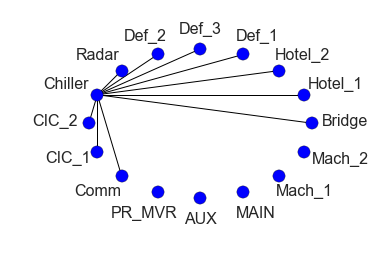

In [108]:
%matplotlib inline

g=simpleship.plex[2]
pos=nx.circular_layout(g)
#pos=nx.graphviz_layout(g,prog='neato')


nx.draw_networkx_edges(g, pos)
nx.draw_networkx_nodes(g,pos,node_color='b',alpha=1,node_size=150)
#nx.draw_networkx_labels(g,pos,font_size=12)

#for n in g.nodes():
    #x,y=pos[n]
    #if n=='CIC_1':
       # plt.text(x,y-0.1,s=n,horizontalalignment='center')
    #else:
        #plt.text(x,y+0.07,s=n,horizontalalignment='center')
shift=1.3

offset=-.1
for n in g.nodes():
    x,y=pos[n]
    if x>0:
        #x_n=x+.15
        x_n=x*shift
    elif x==0.0:
        x_n=x
    else:
        #x_n=x-.2
        x_n=x*(shift)
        
    if y>0:
        #y_n=y+.07
        y_n=y*(shift-.1)
    elif y==0.0:
        y_n=y
    else:
        #y_n=y-.1
        y_n=y*(shift+.08)
        
    if n=='Bridge':
        x_n=1.3
        y_n=-0.03
        
    if n=='CIC_2':
        x_n=-1.3
        y_n=-0.03
        
    if n=='AUX':
        x_n=-0.00
        y_n=-1.35
    if n=='Mach_2':
        x_n+=.05
        y_n-=.02
        
    plt.text(x_n,y_n,s=n,horizontalalignment='center',size=16)
    #else:
        #plt.text(x,y+0.07,s=n,horizontalalignment='center')

plt.axis('off')
plt.savefig('c_sys.png')
plt.show()

In [ ]:
simpleship.plex[0].nodes()

In [ ]:
x,y=pos['AUX']
print x,y

In [ ]:
for x in range(0,11):
    print x/10.0

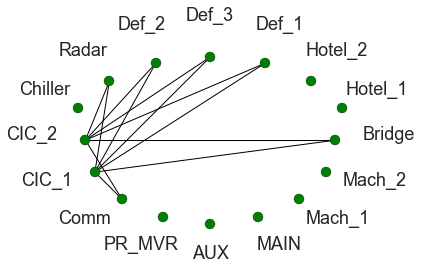

In [77]:
g=simpleship.plex[3]
pos=nx.circular_layout(g)
#pos=nx.graphviz_layout(g,prog='neato')



#nx.draw_networkx_labels(g,pos,font_size=12)

#for n in g.nodes():
    #x,y=pos[n]
    #if n=='CIC_1':
       # plt.text(x,y-0.1,s=n,horizontalalignment='center')
    #else:
        #plt.text(x,y+0.07,s=n,horizontalalignment='center')
shift=1.2 
offset=-.1
r=1.6
pos_n={}
for n in g.nodes():
    x,y=pos[n]
    t=numpy.arctan(y/x)
    if x>0.0 and y>0.0:
        x_n=r*numpy.cos(t)
        y_n=r*numpy.sin(t)
        pos_n[n]=[x_n*.8,y_n*.7]
    elif x<0.0 and y>0.0: #good
        x_n=-r*numpy.cos(t)
        y_n=-r*numpy.sin(t)
        pos_n[n]=[x_n*.8,y_n*.7]
    elif x>0.0 and y<0.0:#good
        x_n=r*numpy.cos(t)
        y_n=r*numpy.sin(t)
        pos_n[n]=[x_n*.7,y_n*.7]
    else:#good
        x_n=-r*numpy.cos(t)
        y_n=-r*numpy.sin(t)
        pos_n[n]=[x_n*.7,y_n*.7]
    plt.text(x_n,y_n,s=n,horizontalalignment='center',size=18)

nx.draw_networkx_edges(g, pos_n)
nx.draw_networkx_nodes(g,pos_n,node_color='g',alpha=1,node_size=100)

plt.axis('off')
#plt.savefig('i_sys.png')
plt.show()